****Alucel - Analisando as vendas****

In [11]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
alucel = pd.read_csv('./data/alucel.csv', sep=',')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [13]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [14]:
print("Quantidade de linhas e coluna: {}".format(alucel.shape))
print("Quantidade de dados nulos: {}".format(alucel.isna().sum().sum()))

Quantidade de linhas e coluna: (61, 2)
Quantidade de dados nulos: 0


In [15]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

**Vendas**

In [16]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data= dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax=ax

In [17]:
def plot_comparacao(x, y1, y2, y3, dataset, title):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(title, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax

**Análise inicial com gráficos**

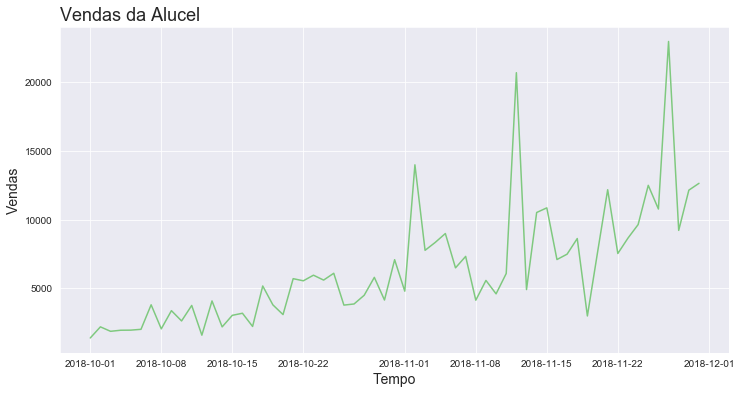

In [18]:
plotar('Vendas da Alucel', 'Tempo', 'Vendas', 'dia', 'vendas', alucel)

In [19]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


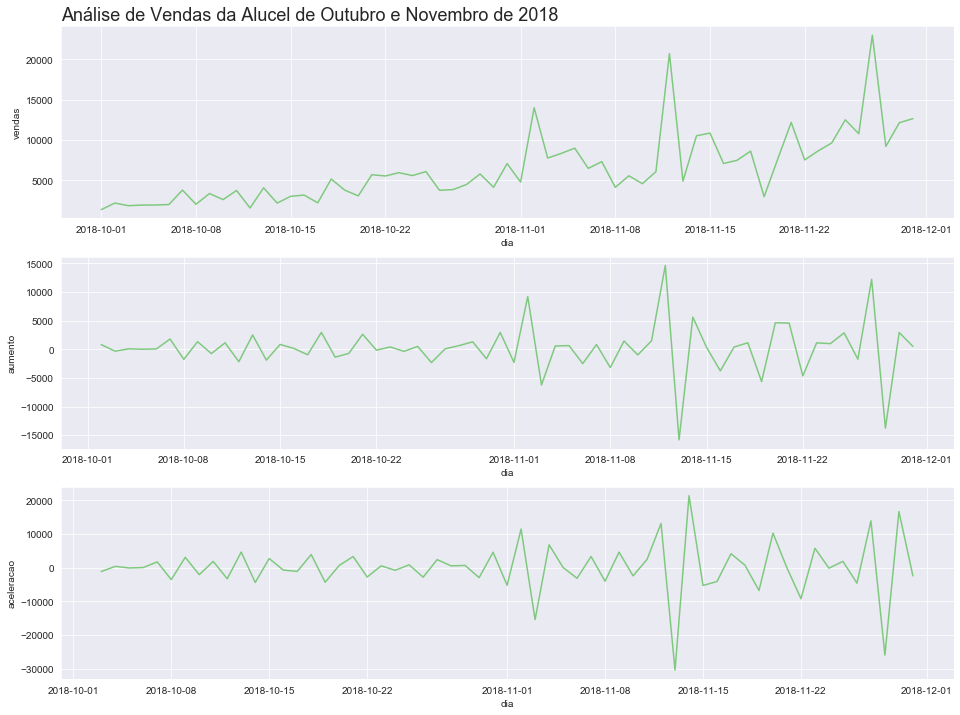

In [20]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de Vendas da Alucel de Outubro e Novembro de 2018')

**Média Móvel**

In [26]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


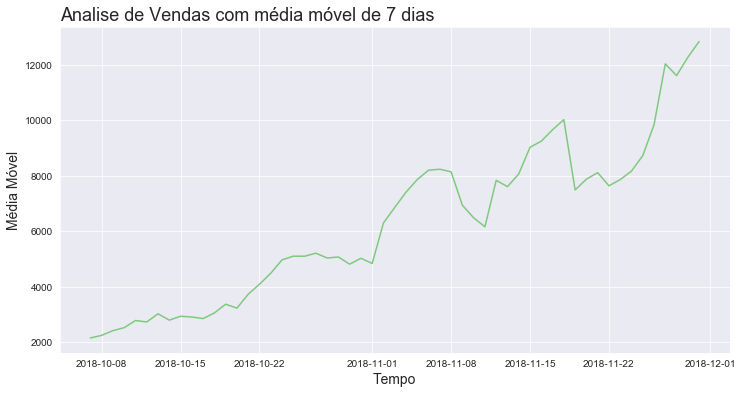

In [27]:
plotar('Analise de Vendas com média móvel de 7 dias',
       'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

In [28]:
alucel['media_movel21'] = alucel['vendas'].rolling(21).mean()
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel,media_movel21
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429,NaN


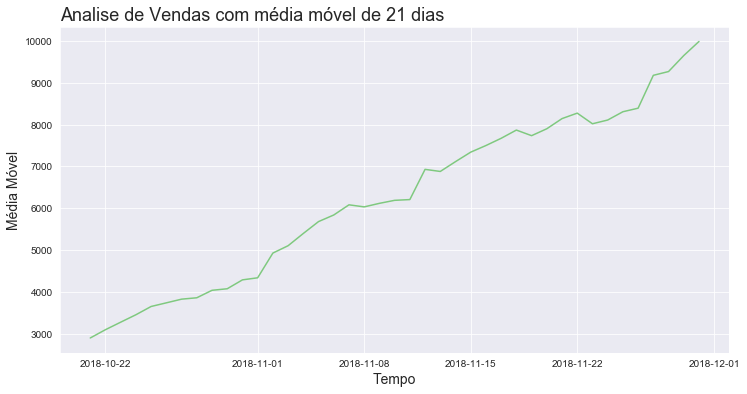

In [31]:
plotar('Analise de Vendas com média móvel de 21 dias',
       'Tempo', 'Média Móvel', 'dia', 'media_movel21', alucel)

Observa que com esse valor acabamos perdendo um pouco das informações sobre as vendas

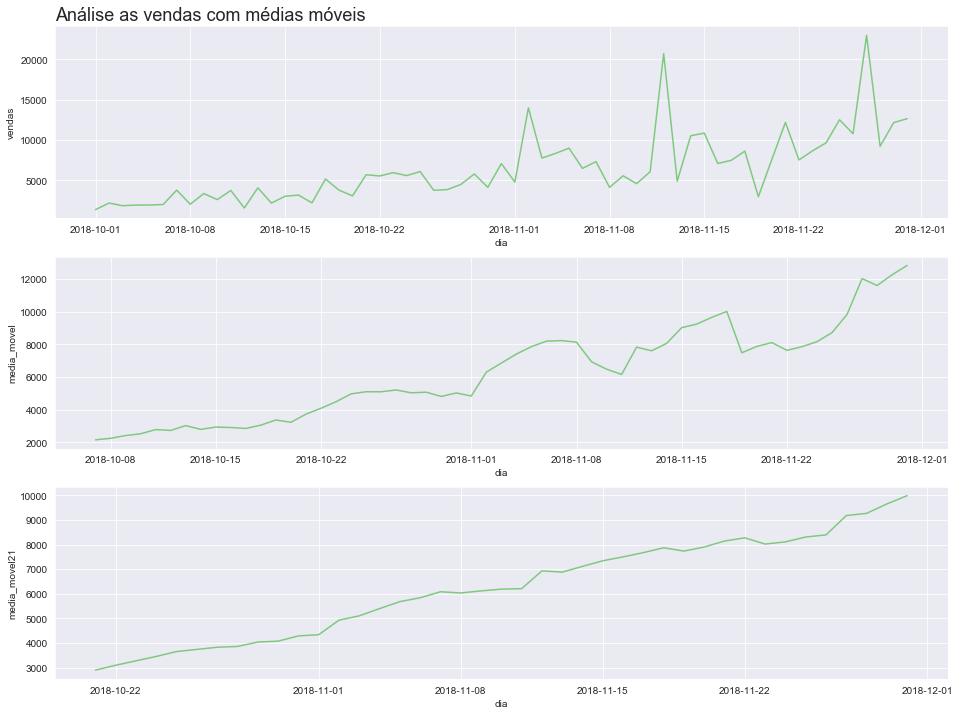

In [30]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel21', alucel, 'Análise as vendas com médias móveis')

